# Time Series Data Pre-processing examples
Provides accompanying computations for the LMU/IFI/DBS Course Bachelor Seminar "Einführung ins wissenschaftliche Arbeiten- Clustering" (WS 2018/19)
Author: Deniz Demirsoy

In [478]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.spatial import distance
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis


def plot_timeseries(*args):
    '''Plots all time series taken as arguments '''
    length = len(args[0])
    months = pd.date_range(start = '2018-01-01', periods = length, freq = 'MS')
    columns = dict()
    enum = enumerate(args)
    
    for i, series in enum:
        # Check arguments and handle errors
        if len(series) != length:
            raise ValueError('Time series are not of equal length.')
        if not isinstance(series, (np.ndarray, np.generic) ):
            raise ValueError('Arguments must be numpy arrays. {} is not!'.format(series))
        # name columns
        columns['ts{}'.format(i+1)] = series
        
    # create dataframe with all series    
    columns['month'] = months
    df = pd.DataFrame(columns).set_index('month')
    
    # plotting
    sns.set(style="dark")
    fig = plt.figure(figsize=(10,6))
    ax = plt.subplot(111)
    
    # format date axis
    locator = mdates.MonthLocator() 
    fmt = mdates.DateFormatter('%b')
    X = plt.gca().xaxis
    X.set_major_locator(locator)
    X.set_major_formatter(fmt)
    
    # legend formatting

    line, = ax.plot(columns['month'],args[0], label='ts1', linewidth=3.0)
    for i, ts in enumerate(args[1:]):
        d_eucl = "{:.2f}".format(distance.euclidean(args[0], ts))
        line, = ax.plot(columns['month'],ts, linewidth=3.0, linestyle=':',label='ts{}, Eucl. distance to ts1: {})'.format(i+2, d_eucl))  
    plt.legend(bbox_to_anchor=(1.2, .8), frameon=False, loc="lower center", borderaxespad=0., ncol=1, fontsize=13,)

    plt.show()


## Simple Time Series

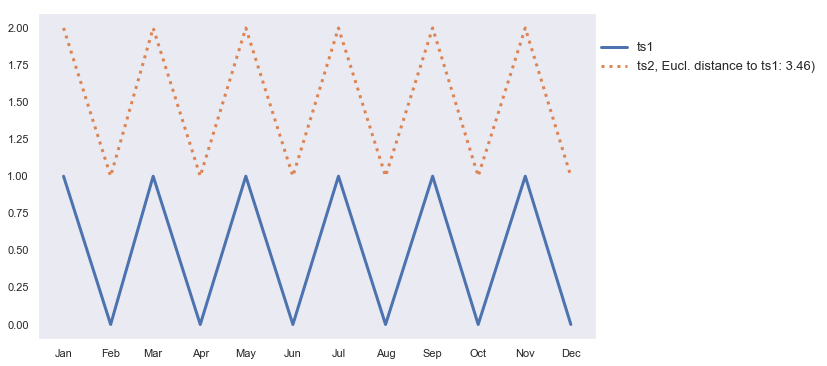

In [479]:
s1 = np.array([1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.])
s2 = s1 + 1.

plot_timeseries(s1,s2)

## Transformation I: Offset Translation

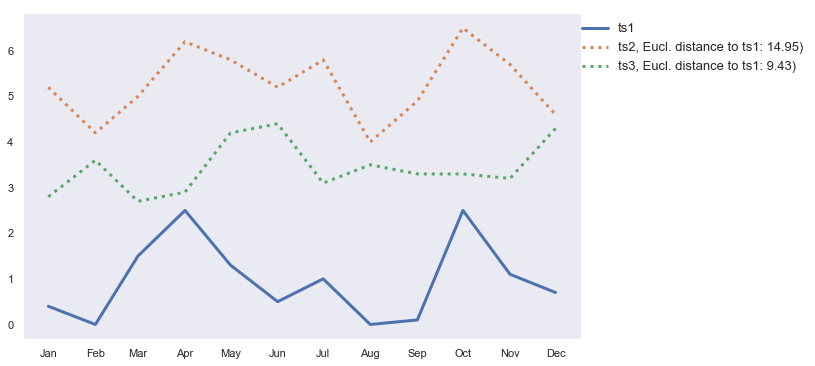

In [480]:
ts1 = np.array([0.4, 0.0, 1.5, 2.5, 1.3, 0.5, 1.0, 0., 0.1, 2.5, 1.1, 0.7])
ts2 = np.array([1.2, 0.2, 1.0, 2.2, 1.8, 1.2, 1.8, 0., 0.9, 2.5, 1.7, 0.6]) + 4
ts3 = np.array([0.2, 1.0, 0.1, 0.3, 1.6, 1.8, 0.5, 0.9, 0.7, 0.7, 0.6, 1.7]) + 2.6
    
plot_timeseries(ts1, ts2, ts3)

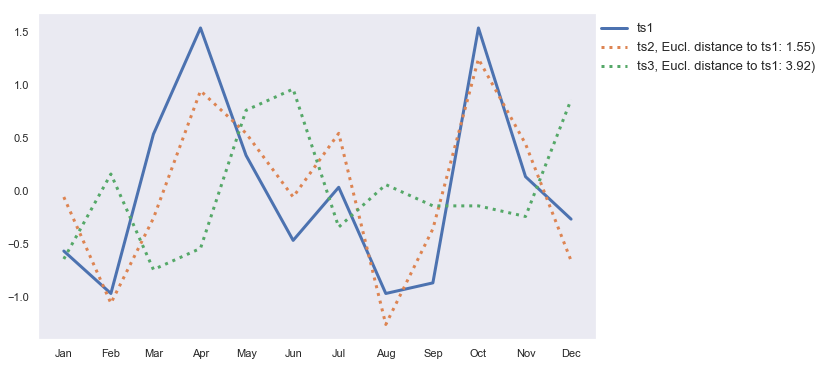

In [481]:
ts1_offset_translated = ts1 - np.average(ts1)
ts2_offset_translated = ts2 - np.average(ts2)
ts3_offset_translated = ts3 - np.average(ts3)
plot_timeseries(ts1_offset_translated, ts2_offset_translated, ts3_offset_translated)

## Transformation II: Amplitude Scaling

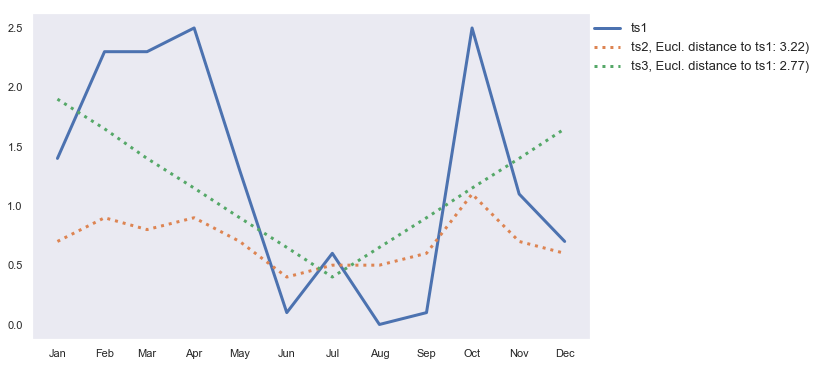

In [482]:
ts1 = np.array([1.4, 2.3, 2.3, 2.5, 1.3, 0.1, 0.6, 0., 0.1, 2.5, 1.1, 0.7])
ts2 = np.array([0.7, 0.9, 0.8, 0.9, 0.7, 0.4, 0.5, 0.5, 0.6, 1.1, 0.7, 0.6]) + 0.
ts3 = np.array([1.8, 1.7, 1.6, 1.5, 1.4, 1.3, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,])*2.5 - 2.6
    
plot_timeseries(ts1, ts2, ts3)

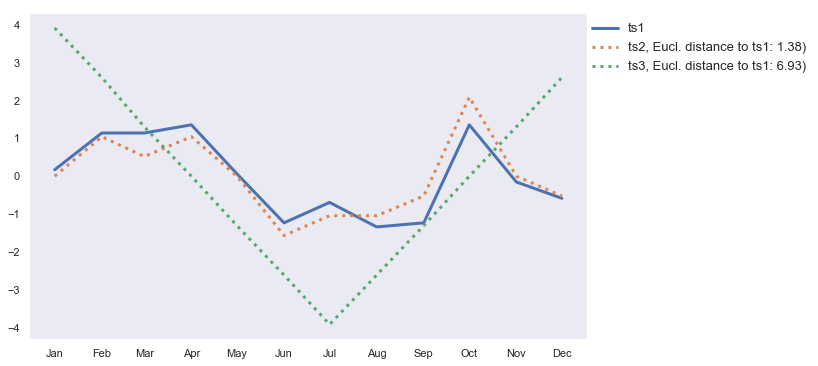

In [483]:
ts1_amplitudes_scaled = (ts1 - np.average(ts1)) / np.std(ts1)
ts2_amplitudes_scaled = (ts2 - np.average(ts2)) / np.std(ts2)
ts3_amplitudes_scaled = (ts3 - np.average(ts3)) / np.std(ts2)
plot_timeseries(ts1_amplitudes_scaled, ts2_amplitudes_scaled, ts3_amplitudes_scaled)

## Transformation III: Linear Trend

/Users/denizthemenace/anaconda3/envs/TimeSeries/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


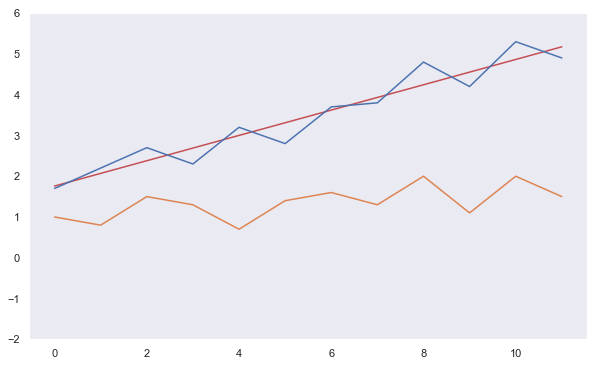

In [484]:
from numpy import arange,array,ones,linalg
from pylab import plot,show

ts1 = np.array([2.0, 2.5, 3.0, 2.6, 3.5, 3.1, 4.0, 4.1, 5.1, 4.5, 5.6, 5.2])-0.3
ts2 = np.array([1.0, 0.8, 1.5, 1.3, 0.7, 1.4, 1.6, 1.3, 2.0, 1.1, 2.0, 1.5]) + 0.

xi = arange(0,12)
A = array([ xi, ones(12)])
# linearly generated sequence
y = ts1
w = linalg.lstsq(A.T,y)[0] # obtaining the parameters

# plotting the line
plt.figure(figsize=(10,6))
plt.ylim(-2,6)
line = w[0]*xi+w[1] # regression line
plot(xi,line,'r-',xi,y,'-')
plot(ts2)

In [485]:
d_before_proprocessing = distance.euclidean(ts1, ts2)

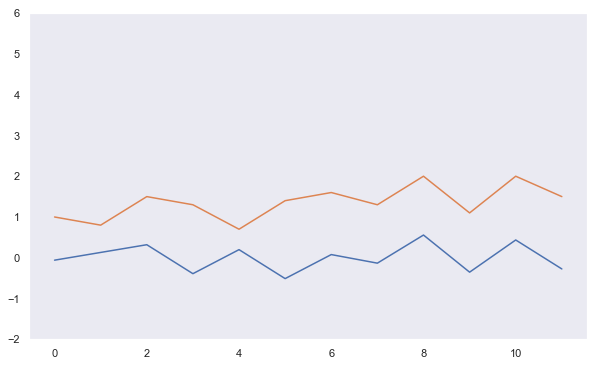

In [486]:
plt.figure(figsize=(10,6))
plt.ylim(-2,6)
ts1 = y -line
plot(ts1)
plot(ts2)
plt.show()

In [487]:
print( 'before preprocessing: ',d_before_proprocessing, '\nafter trend substraction: ',distance.euclidean(ts1, ts2),) 

before preprocessing:  7.978721702127478 
after trend substraction:  4.886740539483666


## Putting all together: I-III
- Offset translation
- Amplitude scaling
- Linear trend correction

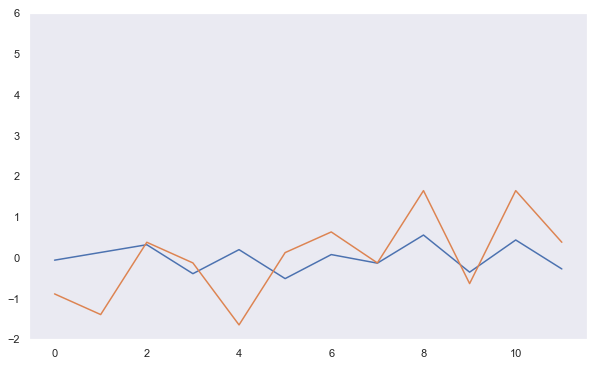

In [488]:
# offset translation
ts1 = ts1 - np.average(ts1)
ts2 = ts2 - np.average(ts2)
# amplitute scaling
ts1 = (ts1 - np.average(ts1)) / np.std(ts1)
ts2 = (ts2 - np.average(ts2)) / np.std(ts2)
# plot
plt.figure(figsize=(10,6))
plt.ylim(-2,6)
ts1 = y -line
plot(ts1)
plot(ts2)
plt.show()

In [489]:
print( 'before preprocessing: ',d_before_proprocessing, '\nafter offset transl., amplitude scaling and trend substraction: ',distance.euclidean(ts1, ts2),) 

before preprocessing:  7.978721702127478 
after offset transl., amplitude scaling and trend substraction:  3.2187958350606887


## Dynamic Time Warping
### Frequency modulation (motivating example)

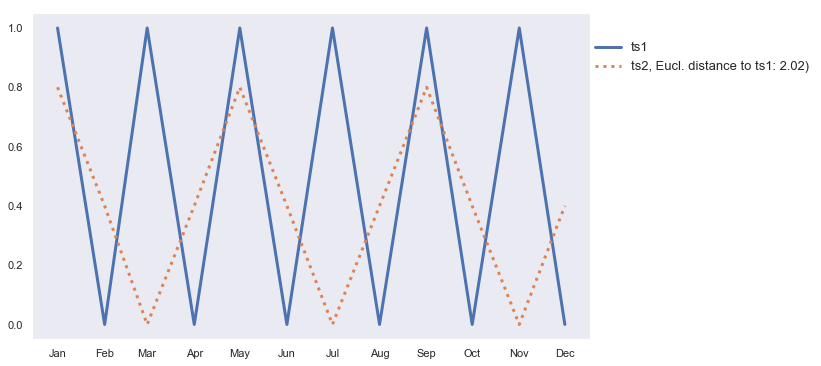

In [490]:
s1 = np.array([1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.])
s2 = np.array([1.,0.5,0.,0.5,1.,0.5,0.,0.5,1.,0.5,0.,0.5])*0.8

plot_timeseries(s1,s2)

### Phase Shift (motivating example)

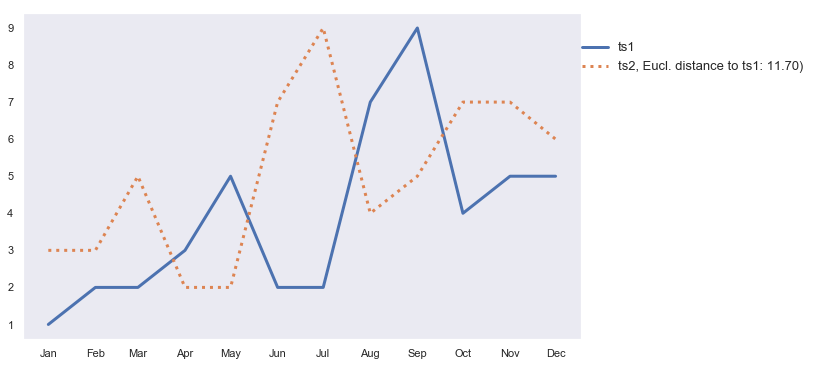

(None, None)

In [491]:
ts1 = np.array([1, 2, 2, 3, 5, 2, 2, 7, 9, 4, 5, 5])
ts2 = np.array([3, 3, 5, 2, 2, 7, 9, 4, 5, 7, 7, 6])
plot_timeseries(ts1, ts2)


path = dtw.warping_path(ts2, ts1)
dtwvis.plot_warping(ts2, ts1, path, filename="warp.png")

### Applying DTW

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a20383208>,
       dtype=object))

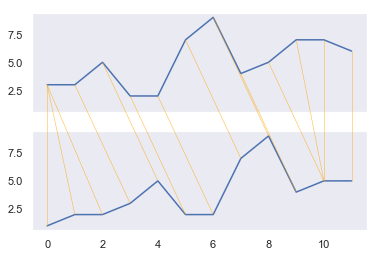

In [492]:
dtwvis.plot_warping(ts2, ts1, path)

In [493]:
print('Euclidian: ', distance.euclidean(ts1, ts2), '\nDTW: ', dtw.distance(ts2, ts1) )

Euclidian:  11.704699910719626 
DTW:  3.872983346207417
